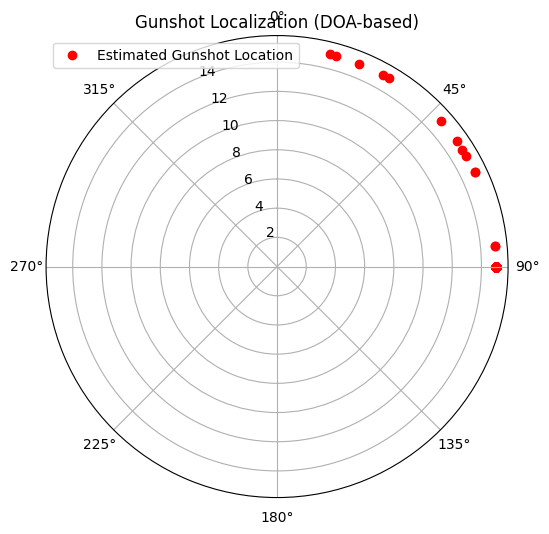

Unique DOA 1: 14.03 degrees
Unique DOA 2: 15.53 degrees
Unique DOA 3: 22.11 degrees
Unique DOA 4: 28.91 degrees
Unique DOA 5: 30.62 degrees
Unique DOA 6: 48.39 degrees
Unique DOA 7: 55.17 degrees
Unique DOA 8: 57.81 degrees
Unique DOA 9: 59.81 degrees
Unique DOA 10: 64.43 degrees
Unique DOA 11: 64.43 degrees
Unique DOA 12: 84.50 degrees
Unique DOA 13: 84.62 degrees
Unique DOA 14: 90.00 degrees


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
SPEED_OF_SOUND = 343  # Speed of sound in air (m/s)
MIC_DISTANCE = 10  # Mic spacing (assumption)

# Load dataset
csv_file = "generated_gunshot_data.csv"  
data = pd.read_csv(csv_file)

# Extract TDOA values
tdoa_values = data["TDOA"].values  

# Function to compute DOA from TDOA
def compute_doa(tdoa):
    """
    Compute the Direction of Arrival (DOA) using TDOA
    :param tdoa: Time Difference of Arrival (s)
    :return: Angle of Arrival (radians)
    """
    sin_theta = (tdoa * SPEED_OF_SOUND) / MIC_DISTANCE
    sin_theta = np.clip(sin_theta, -1, 1)  # Fix: Ensure valid range
    return np.arcsin(sin_theta)

# Compute DOA for each sample (convert to radians for polar plot)
doa_values = np.array([compute_doa(t) for t in tdoa_values])

# Assume gunshot is within 15m radius
radius = 15  

# Convert DOA to (X, Y) coordinates
x_coords = radius * np.cos(doa_values)
y_coords = radius * np.sin(doa_values)

# Visualization: Polar Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
ax.set_theta_zero_location('N')  # North as 0 degrees
ax.set_theta_direction(-1)  # Clockwise direction

# Plot gunshot directions
ax.scatter(doa_values, [radius] * len(doa_values), c='red', marker='o', label="Estimated Gunshot Location")

# Formatting
ax.set_rlabel_position(-22.5)  
ax.set_title("Gunshot Localization (DOA-based)")
ax.legend()

plt.show()

# Print estimated DOA values
# Convert DOA values to degrees and find unique values
unique_doa_degrees = np.unique(np.degrees(doa_values))

# Print unique DOA values
for i, doa in enumerate(unique_doa_degrees):
    print(f"Unique DOA {i+1}: {doa:.2f} degrees")



In [12]:
import numpy as np

# Example: Unique DOA values in degrees (Replace with your actual values)
unique_doa_degrees = unique_doa_degrees  # Example DOAs

# Convert degrees to radians
unique_doa_radians = np.radians(unique_doa_degrees)

# Assume a fixed distance R from the microphone (e.g., 50 meters)
R = 50  

# Compute X, Y coordinates
X_coords = R * np.cos(unique_doa_radians)
Y_coords = R * np.sin(unique_doa_radians)
coords=zip(X_coords, Y_coords)
# Print coordinates
for i, (x, y) in enumerate(zip(X_coords, Y_coords)):
    print(f"Gunshot {i+1}: Estimated Coordinates -> X: {x:.2f}, Y: {y:.2f}")


Gunshot 1: Estimated Coordinates -> X: 48.51, Y: 12.12
Gunshot 2: Estimated Coordinates -> X: 48.18, Y: 13.38
Gunshot 3: Estimated Coordinates -> X: 46.32, Y: 18.82
Gunshot 4: Estimated Coordinates -> X: 43.77, Y: 24.17
Gunshot 5: Estimated Coordinates -> X: 43.03, Y: 25.47
Gunshot 6: Estimated Coordinates -> X: 33.20, Y: 37.38
Gunshot 7: Estimated Coordinates -> X: 28.56, Y: 41.04
Gunshot 8: Estimated Coordinates -> X: 26.64, Y: 42.31
Gunshot 9: Estimated Coordinates -> X: 25.14, Y: 43.22
Gunshot 10: Estimated Coordinates -> X: 21.58, Y: 45.10
Gunshot 11: Estimated Coordinates -> X: 21.58, Y: 45.10
Gunshot 12: Estimated Coordinates -> X: 4.79, Y: 49.77
Gunshot 13: Estimated Coordinates -> X: 4.69, Y: 49.78
Gunshot 14: Estimated Coordinates -> X: 0.00, Y: 50.00


In [13]:
import numpy as np

# Function to convert (X, Y) meters to Latitude & Longitude
def convert_xy_to_latlon(ref_lat, ref_lon, x, y):
    """
    Convert X, Y coordinates (meters) into latitude & longitude relative to a reference point.
    
    Args:
    - ref_lat (float): Latitude of the reference microphone
    - ref_lon (float): Longitude of the reference microphone
    - x (float): X-coordinate (meters) relative to reference
    - y (float): Y-coordinate (meters) relative to reference

    Returns:
    - new_lat (float): Estimated latitude of gunshot
    - new_lon (float): Estimated longitude of gunshot
    """
    # Constants
    meters_per_degree_lat = 111_320  # Approximate meters per degree of latitude
    meters_per_degree_lon = 111_320 * np.cos(np.radians(ref_lat))  # Adjust for latitude

    # Convert X, Y to latitude & longitude
    new_lat = ref_lat + (y / meters_per_degree_lat)
    new_lon = ref_lon + (x / meters_per_degree_lon)

    return new_lat, new_lon


# Example Input: Microphone Geolocation (Change this to your actual mic location)
mic_lat = 37.7749  # San Francisco Latitude
mic_lon = -122.4194  # San Francisco Longitude

# Example Estimated Gunshot Coordinates (X, Y) from DOA method
gunshot_xy_coords = coords


# Convert all estimated gunshot locations to latitude & longitude
for i, (x, y) in enumerate(gunshot_xy_coords):
    est_lat, est_lon = convert_xy_to_latlon(mic_lat, mic_lon, x, y)
    print(f"Gunshot {i+1}: Estimated Geolocation -> Latitude: {est_lat:.6f}, Longitude: {est_lon:.6f}")


Gunshot 1: Estimated Geolocation -> Latitude: 37.775009, Longitude: -122.418849
Gunshot 2: Estimated Geolocation -> Latitude: 37.775020, Longitude: -122.418852
Gunshot 3: Estimated Geolocation -> Latitude: 37.775069, Longitude: -122.418874
Gunshot 4: Estimated Geolocation -> Latitude: 37.775117, Longitude: -122.418903
Gunshot 5: Estimated Geolocation -> Latitude: 37.775129, Longitude: -122.418911
Gunshot 6: Estimated Geolocation -> Latitude: 37.775236, Longitude: -122.419023
Gunshot 7: Estimated Geolocation -> Latitude: 37.775269, Longitude: -122.419075
Gunshot 8: Estimated Geolocation -> Latitude: 37.775280, Longitude: -122.419097
Gunshot 9: Estimated Geolocation -> Latitude: 37.775288, Longitude: -122.419114
Gunshot 10: Estimated Geolocation -> Latitude: 37.775305, Longitude: -122.419155
Gunshot 11: Estimated Geolocation -> Latitude: 37.775305, Longitude: -122.419155
Gunshot 12: Estimated Geolocation -> Latitude: 37.775347, Longitude: -122.419346
Gunshot 13: Estimated Geolocation -> 